In [3]:
# import pydeconv
import pydeconv.point_spread_function as psf
from skimage import data,color
import matplotlib.pyplot as plt
import numpy as np

from skimage.transform import rescale, resize, downscale_local_mean


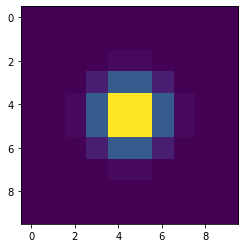

In [11]:
image = color.rgb2gray(data.astronaut())
image = rescale(image, 0.25, anti_aliasing=False)
psf_dims,psf_mu,psf_sigma = [10,10],[0,0],[0.2,0.2]
psf_image = psf.gaussian(dims=psf_dims, mu=psf_mu, sigma=psf_sigma)

plt.imshow(image)
plt.imshow(psf_image)

In [14]:
r_dist = psf.radial_map(image)
sigma_map = psf.map_of_fun(r_dist, lambda r : [r + 0.01, r + 0.01])
mu_map = psf.map_of_fun(r_dist, lambda r : [0, 0])

# sigma_map = psf.map_of_fun(r_dist, lambda r : [0.2,0.2])
# mu_map = psf.map_of_fun(r_dist, lambda r : [0, 0])

variable_psf_image = psf.variable_gaussian_psf(image, psf_dims, mu_map, sigma_map)

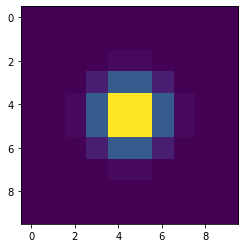

In [15]:
plt.imshow(variable_psf_image[64,64])

100%|██████████| 16384/16384 [00:04<00:00, 3921.51it/s]
[########################################] | 100% Completed | 10.5s


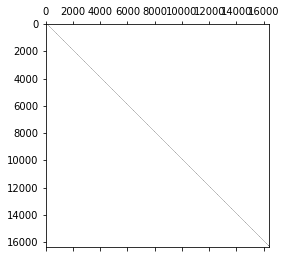

In [16]:
# Build H from PSF
H = psf.psf_to_H(variable_psf_image)
plt.matshow(H.todense(),cmap="binary")
# psf_array = variable_psf_image

In [5]:
# psf_array = variable_psf_image
# dims = int(np.divide(len(psf_array.shape),2)); dims
# image_shape = psf_array.shape[0:dims];
# psf_shape = psf_array.shape[dims:]

In [335]:
# def put_centre(array, inset, coord, mode="clip"):
#     put_coord = coord - np.floor(np.divide(inset.shape, 2)).astype(int)
#     put_coord = coord
#     np.insert(array, put_coord, inset)
#     return array

In [336]:
# tl = coord - np.floor(np.divide(current_psf.shape, 2)).astype(int)
# br = coord + np.floor(np.divide(current_psf.shape, 2)).astype(int)

In [337]:
# tl = coord
# br = coord + np.floor(np.divide(current_psf.shape, 1)).astype(int)

In [338]:
# plt.imshow(current_psf)

In [318]:

# lines = [np.arange(*i) for i in list(zip(tl,br))]
# grid = np.meshgrid(*lines)

# # delta_image[tuple(grid)] = current_psf



In [319]:
# delta_image = np.zeros(image_shape)
# mask = np.zeros(image_shape)
# mask[grid] = True
# delta_image[grid]= current_psf
# plt.imshow(delta_image)

In [320]:
# delta_image = np.zeros(image_shape)
# np.putmask(delta_image, mask, current_psf)
# plt.imshow(delta_image)


In [321]:
# delta_image = np.zeros(image_shape)

# np.put(delta_image, grid.flatten(), current_psf.flatten(), mode='clip')
# plt.imshow(delta_image)

In [322]:
# delta_image = np.zeros(image_shape)
# np.put(delta_image, list(grid), current_psf, mode='clip')
# plt.imshow(delta_image)

In [323]:
# delta_image = np.zeros(image_shape)
# np.insert(delta_image, grid, current_psf)
# plt.imshow(delta_image)

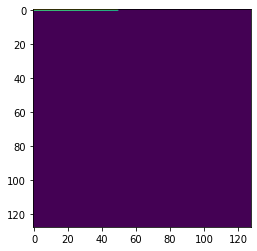

In [343]:
# import scipy

# dims = int(np.divide(len(psf_array.shape), 2))
# image_shape = psf_array.shape[0:dims]
# psf_shape = psf_array.shape[dims:]
# method = "convolve"
# coord = np.unravel_index(i, image_shape)
# current_psf = psf_array[coord]
# # Get the xy coordinates of the ith pixel in the original image
# delta_image = np.zeros(image_shape)
# if method == "convolve":
#     delta_image[coord] = 1
#     delta_PSF = scipy.ndimage.convolve(
#         delta_image, current_psf
#     )  # Convolve PSF with a image with a single 1 at coord
# if method == "put":
#     delta_PSF = put_centre(delta_image, current_psf, coord)

In [344]:
# delta_PSF = put_centre(delta_image, current_psf, [0,0])

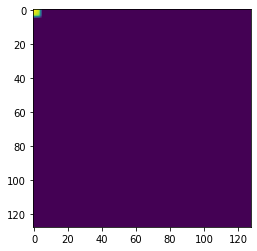

In [345]:
# plt.imshow(delta_PSF)

In [403]:
# import dask.array as da
# import dask
# from scipy.sparse import dok_matrix, coo_matrix

# from tqdm import tqdm

# # def put_centre(array, inset, coord, mode="clip"):
# #     put_coord = coord - np.floor(np.divide(inset.shape, 2)).astype(int)
# #     np.put(array, put_coord, inset, mode=mode)
# #     return array

# def get_psf_at_coord(psf_array,coord,method="convolve"):
#     dims = int(np.divide(len(psf_array.shape), 2))
#     image_shape = psf_array.shape[0:dims]
#     psf_shape = psf_array.shape[dims:]

#     # coord = np.unravel_index(i, image_shape)
#     current_psf = psf_array[coord]
#     # Get the xy coordinates of the ith pixel in the original image
#     delta_image = np.zeros(image_shape)
#     if method == "convolve":
#         delta_image[coord] = 1
#         delta_PSF = scipy.ndimage.convolve(
#             delta_image, current_psf
#         )  # Convolve PSF with a image with a single 1 at coord
#     if method == "put":
#         delta_PSF = put_centre(delta_image, current_psf, coord)
#     return delta_PSF
    
# dims = int(np.divide(len(psf_array.shape), 2))
# image_shape = psf_array.shape[0:dims]
# psf_shape = psf_array.shape[dims:]

# # coord = np.unravel_index(i, image_shape)
# # current_psf = psf_array[coord]

# delta_image = np.zeros(image_shape)
# # delta_PSF = put_centre(delta_image, current_psf, coord)


# N_v = np.multiply.reduce(image_shape)
# # Faulty assumption that N_v equals N_p but ok for now
# N_p = np.multiply.reduce(image_shape)


# # measurement_matrix = dok_matrix((N_v, N_p))
# # measurement_matrix_da = da.from_array(measurement_matrix)
# # measurement_matrix_da[0,0] = 1
# # method = "put"
# # delta_PSF = get_psf_at_coord(psf_array,coord)


# # measurement_matrix = dok_matrix((N_v, N_p))
# # measurement_matrix_da = da.from_array(measurement_matrix)

In [426]:
# import sparse
# def psf_to_H_dask(psf_array):
#     dims = int(np.divide(len(psf_array.shape), 2))
#     image_shape = psf_array.shape[0:dims]
#     psf_shape = psf_array.shape[dims:]

#     N_v = np.multiply.reduce(image_shape)
#     # Faulty assumption that N_v equals N_p but ok for now
#     N_p = np.multiply.reduce(image_shape)

#     dask_list = []
#     delayed_psf_array = dask.delayed(psf_array)
#     for i in tqdm(np.arange(N_v)):
#         # delta_PSF = get_psf_at_coord(psf_array,coord)
#         coord = np.unravel_index(i,image_shape)
#         delta_dask = dask.delayed(get_psf_at_coord)(delayed_psf_array,coord)
#         array_da = da.from_delayed(delta_dask,
#                                 shape=image_shape,
#                                 dtype=float)
#         # delta_dask_flat = array_da.flatten()
#         # sparse_da = delta_dask_flat.map_blocks(sparse.COO)
#         # delta_dask_sparse = dask.delayed(dok_matrix)(delta_dask_flat)
#         dask_list.append(array_da.flatten())
#     # stack = dask.array.concatenate(dask_list,axis=0)

#     stack = dask.array.stack(dask_list)
#     stack = stack.map_blocks(sparse.COO)
#     with ProgressBar():
#         out = stack.compute()
#     return out


100%|██████████| 16384/16384 [00:03<00:00, 4233.59it/s]
[########################################] | 100% Completed | 14.0s


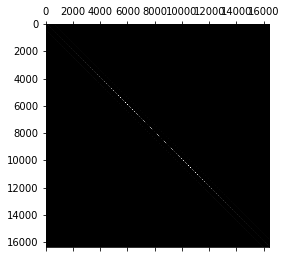

In [428]:
# plt.matshow(out.todense(),cmap="gray")

In [421]:
# plt.imshow(psf_array[0,0,:,:])
# delta_PSF = get_psf_at_coord(psf_array,[0,0]);
# plt.imshow(delta_PSF)

In [422]:
# delta_PSF = get_psf_at_coord(psf_array,coord);
# plt.imshow(delta_PSF)

100%|██████████| 16384/16384 [00:01<00:00, 8259.23it/s]


In [405]:
# stack

dask.array<stack, shape=(16384, 128, 128), dtype=float64, chunksize=(1, 128, 128), chunktype=numpy.ndarray>

[########################################] | 100% Completed | 14.3s


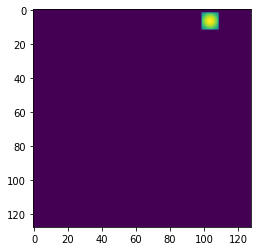

In [410]:
# plt.matshow(H,cmap="binary")

In [411]:
# H = out.reshape(np.multiply.reduce(image_shape),-1)

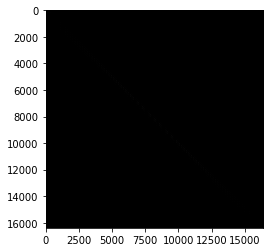

In [417]:
# plt.imshow(H,cmap="gray")

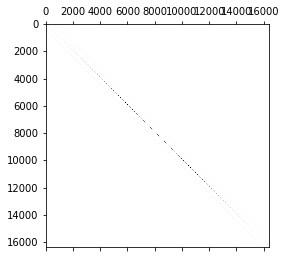

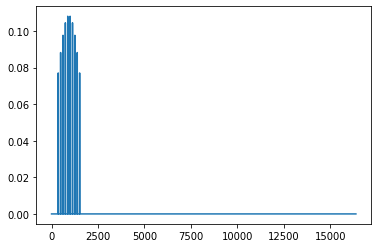

In [416]:
# plt.plot(H[1000])

In [391]:
# for i in tqdm(np.arange(N_v)):
#     coord = np.unravel_index(i, image_shape)
#     out = get_psf_at_coord(psf_array,coord)
#     out.flatten()


SyntaxError: unexpected EOF while parsing (<ipython-input-391-1d5d5b670f4d>, line 5)

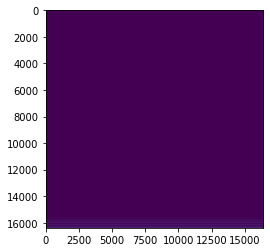

In [352]:
# # import dask.dataframe as dd
# a = dask.array.from_delayed(stack,shape=(N_v, N_p),dtype=float)
# with ProgressBar():
#     a.compute()

In [353]:
# from dask.diagnostics import ProgressBar
# a = dask.array.from_delayed(stack,shape=(N_v, N_p),dtype=float)
# # b = a.map_blocks(coo_matrix)
# # b = a
# with ProgressBar():
#     a.compute()

In [ ]:
a

In [24]:


# method="put"

# """ Takes and ND psf array (image_coords,psf_coords)"""
# ### Very slow way of doing this, could dask it.
# # Assumes that there are as many dimensions in the PSF as there are in the image
# # Unsure if this is faulty
# dims = int(np.divide(len(psf_array.shape), 2))
# image_shape = psf_array.shape[0:dims]
# psf_shape = psf_array.shape[dims:]



In [65]:
# def get_psf_at_coord(psf_array,coord):
#     dims = int(np.divide(len(psf_array.shape), 2))
#     image_shape = psf_array.shape[0:dims]
#     psf_shape = psf_array.shape[dims:]

#     coord = np.unravel_index(i, image_shape)
#     current_psf = psf_array[coords]
#     # Get the xy coordinates of the ith pixel in the original image
#     delta_image = np.zeros(image_shape)
#     if method == "convolve":
#         delta_image[coords] = 1 
#         delta_PSF = scipy.ndimage.convolve(
#             delta_image, current_psf
#         )  # Convolve PSF with a image with a single 1 at coord
#     if method == "put":
#         delta_PSF = put_centre(delta_image, current_psf, coord)
#     return delta_PSF

In [103]:
# import dask.array as da
# import dask
# from scipy.sparse import dok_matrix, coo_matrix
# measurement_matrix = dok_matrix((N_v, N_p))
# measurement_matrix_da = da.from_array(measurement_matrix)

# dask_list = []
# delayed_psf_array = dask.delayed(psf_array)
# for i in tqdm(np.arange(N_v)):
#     # delta_PSF = get_psf_at_coord(psf_array,coord)
#     coord = np.unravel_index(i, image_shape)
#     delta_dask = dask.delayed(get_psf_at_coord)(delayed_psf_array,coord)
#     delta_dask_flat = delta_dask.flatten()
#     # delta_dask_sparse = dask.delayed(dok_matrix)(delta_dask_flat)
#     dask_list.append(delta_dask_flat)
# stack = dask.delayed(dask_list, traverse=True)

100%|██████████| 262144/262144 [00:41<00:00, 6275.69it/s]


In [1]:
# b = a.map_blocks(dok_matrix);b

NameError: name 'dask' is not defined

[                                        ] | 0% Completed |  5min 49.5s

In [76]:
# delta_dask.flatten().compute()

array([0.0691194, 0.       , 0.       , ..., 0.       , 0.       ,
       0.       ])

In [78]:
# x = da.stack([delta_dask.flatten(),delta_dask.flatten()], axis=0)

TypeError: Truth of Delayed objects is not supported

array([[0.05809211, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [54]:
# delta_PSF = put_centre(delta_image, current_psf, coord);delta_PSF

array([[0.0691194, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

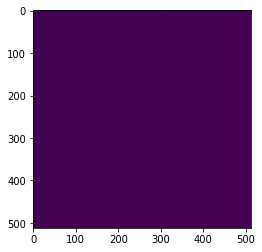

In [55]:
# plt.imshow(delta_PSF)

In [52]:
# coord = [0,0]

In [48]:
# put_coord = coord - np.floor(np.divide(inset.shape, 2)).astype(int)


NameError: name 'inset' is not defined

In [47]:
# def put_centre(array, inset, coord, mode="clip"):
#     put_coord = coord - np.floor(np.divide(inset.shape, 2)).astype(int)
#     np.put(array, put_coord, inset, mode=mode)
#     return array

In [45]:
# delta_image

array([[0.05809211, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [35]:
# a = get_psf_at_coord(psf_array,[0,0])

In [36]:
a

In [25]:
# for i in tqdm(np.arange(N_v)):
#     coords = np.unravel_index(i, image_shape)
#     current_psf = psf_array[coords]
#     # Get the xy coordinates of the ith pixel in the original image
#     delta_image = np.zeros(image_shape)
#     if method == "convolve":
#         delta_image[coords] = 1
#         delta_PSF = scipy.ndimage.convolve(
#             delta_image, current_psf
#         )  # Convolve PSF with a image with a single 1 at coord
#     if method == "put":
#         delta_PSF = put_centre(delta_image, current_psf, coords)
#     measurement_matrix[i, :] = delta_image.flatten()

  0%|          | 316/262144 [01:08<15:45:28,  4.62it/s]


KeyboardInterrupt: 

In [31]:
y

dask.array<array, shape=(262144, 262144), dtype=float64, chunksize=(4096, 4096), chunktype=scipy.dok_matrix>

In [20]:
plt.imshow(measurement_matrix)

NameError: name 'measurement_matrix' is not defined

In [5]:
psf_array = variable_psf_image
dims = int(np.divide(len(psf_array.shape),2)); dims
image_shape = psf_array.shape[0:dims];
psf_shape = psf_array.shape[dims:]

In [16]:

    N_v = np.multiply.reduce(image_shape)
    # Faulty assumption that N_v equals N_p but ok for now
    N_p = np.multiply.reduce(image_shape)

In [17]:
N_p

262144

In [20]:
from tqdm import tqdm

for i in tqdm(np.arange(N_v)):
    coords = np.unravel_index(i, image_shape)
    current_psf = psf_array[coords]
        # Get the xy coordinates of the ith pixel in the original image
    delta_image = np.zeros_like(image_shape)
    delta_image[coords] = 1
    delta_PSF = scipy.ndimage.convolve(delta_image, psf_current) # Convolve PSF with a image with a single 1 at coord
    
    measurement_matrix[i, :] = delta_PSF.flatten()

  0%|          | 0/262144 [00:00<?, ?it/s]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [39]:
    # measurement_matrix = np.empty([N_v,N_p])
from scipy.sparse import dok_matrix

measurement_matrix = dok_matrix((N_v, N_p))
measurement_matrix[i, :] = delta_PSF.flatten()

In [ ]:
image_shape

In [40]:
    dims = int(np.divide(len(psf_array.shape),2))
    image_shape = psf_array.shape[0:dims]
    psf_shape = psf_array.shape[dims:]

    N_v = np.multiply.reduce(image_shape)
    # Faulty assumption that N_v equals N_p but ok for now
    N_p = np.multiply.reduce(image_shape)

    measurement_matrix = dok_matrix((N_v, N_p))

    for i in tqdm(np.arange(N_v)):
        coords = np.unravel_index(i, image_shape)
        current_psf = psf_array[coords]
          # Get the xy coordinates of the ith pixel in the original image
        delta_image = np.zeros(image_shape)
        delta_image[coords] = 1
        delta_PSF = scipy.ndimage.convolve(delta_image, current_psf) # Convolve PSF with a image with a single 1 at coord
        
        measurement_matrix[i, :] = delta_PSF.flatten()

TypeError: slice indices must be integers or None or have an __index__ method

In [30]:
from scipy import ndimage
delta_PSF = ndimage.convolve(delta_image, psf_current)

NameError: name 'psf_current' is not defined

In [14]:
N_v

262144

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
def map_of_fun(x_map,fun):
    fun_map = np.empty(list(x_map.shape).append(x_map.ndim))
    for i,x in x_map:
        coords = np.unravel_index(i,r_dist.shape)
        fun_map[coords] = fun(x)
    return fun_map
sigma_fun = sigma_scale
sigma_map = sigma_fun(r_map)
# psf.variable_gaussian_psf(image,psf_dims,psf_mu,sigma_scale)

In [154]:
fun_map = np.empty(list(x_map.shape)+[x_map.ndim])
for i, x in enumerate(np.nditer(x_map)):
    coords = np.array(np.unravel_index(i, r_dist.shape))
    # print(x)
    fun_map[coords] = x

In [155]:
def map_of_fun(x_map, fun):
    fun_map = np.empty(list(x_map.shape)+[x_map.ndim])
    for i, x in enumerate(np.nditer(x_map)):
        coords = np.array(np.unravel_index(i, r_dist.shape))
        # print(x)
        fun_map[coords] = x
    return fun_map

def sigma_scale(r):
    return [r + 0.01,r + 0.01]
def mu_scale(r):
    return [0,0]
sigma_map = psf.map_of_fun(r_dist,sigma_scale)
mu_map = psf.map_of_fun(r_dist,sigma_scale)

variable_gaussian_psf(image,)

In [142]:
fun_map[coords] = [1,1]

In [136]:
fun_map = np.empty(list(r_dist.shape).append(r_dist.ndim))

<ipython-input-136-057b0c757cdb>:1: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  fun_map = np.empty(list(r_dist.shape).append(r_dist.ndim))


In [137]:
x_map = r_dist
print(x_map.ndim)
fun_map = np.empty(list(x_map.shape)+[x_map.ndim])

2


In [139]:

# psf.variable_gaussian_psf(image,psf_dims,psf_mu,sigma_scale)

ValueError: shape mismatch: value array of shape (2,512)  could not be broadcast to indexing result of shape (1,2,512,2)

In [101]:
r_dist = r_map
np.empty([r_dist.shape+r_dist.ndim])

TypeError: can only concatenate tuple (not "int") to tuple

In [88]:
    image_dims = image.shape
    grid_coords = np.meshgrid(*[np.linspace(-1, 1, image_dim) for image_dim in image_dims])
    r_map = np.add.reduce(np.power(grid_coords,2.0))
    psf_array = psf_fun(r_map)

TypeError: Cannot construct a dtype from an array

In [89]:
    def psf_fun(r_map):
        # psf_array = 
        sigma_map = sigma_fun(r_map)
        psf_array = gaussian(psf_dims,mu,sigma_map)
        for i,sigma in enumerate(sigma_map):
            psf_array[i] = gaussian(psf_dims,mu,sigma)
        return psf_array

NameError: name 'sigma_map' is not defined

In [90]:
mu = [0,0]

In [93]:
sigma_map = sigma_fun(r_map)

TypeError: Cannot construct a dtype from an array

In [92]:
psf_array = np.empty(list(image.shape)+list(psf_dims))

In [ ]:
[list(image.shape)+list(psf_dims)]

In [ ]:
psf_array.shape

In [ ]:
        for i,sigma in enumerate(sigma_map):
            coords = np.unravel_index(i,image.shape)
            psf_array[coords,:,:] = psf.gaussian(psf_dims,mu,sigma)

In [86]:
len(sigma_map)

2

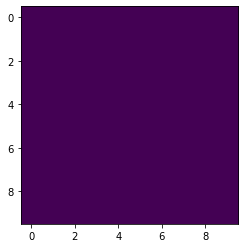

In [80]:
plt.imshow(psf_array[200,200])

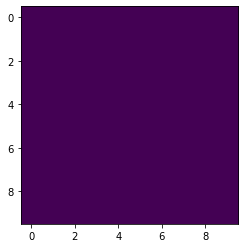

In [81]:
plt.imshow(psf_array[0,0])

In [ ]:
plt.imshow(sigma_map)

In [ ]:
sigma_map.min()

In [77]:
sigma_map.max()

AttributeError: 'list' object has no attribute 'max'

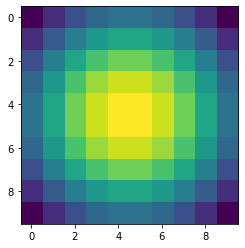

In [78]:
plt.imshow(psf.gaussian(psf_dims,mu,[1,1]))

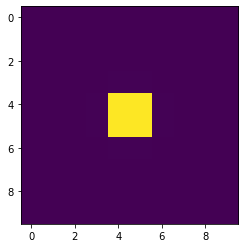

In [79]:
plt.imshow(psf.gaussian(psf_dims,mu,[0.1,0.1]))

In [59]:
sigma_map.shape

(512, 512)

In [157]:
def variable_psf(image, psf_fun):
    """
    Image is only used for finding the extent of the image.
    psf_fun takes in a radius, probably would be better with a normalised coord
    """
    # image_dims = image.shape
    # grid_coords = np.meshgrid(
    #     *[np.linspace(-1, 1, image_dim) for image_dim in image_dims]
    # )
    # r_map = np.add.reduce(np.power(grid_coords, 2.0))

    psf_array = map_of_fun(image,psf_fun)
    # psf_array = psf_fun(r_map)
    return psf_array

In [201]:
def variable_gaussian_psf(image, psf_dims, mu_map, sigma_map):
    fun_map = np.empty(list(image.shape)+list(psf_dims))
    for i, x in enumerate(np.nditer(image)):
        coords = np.unravel_index(i, image.shape)
        # print(x)
        fun_map[coords] = psf.gaussian(psf_dims,mu_map[coords],sigma_map[coords])
    return fun_map

def map_of_fun(x_map, fun):
    fun_map = np.empty(list(x_map.shape)+[x_map.ndim])
    for i, x in enumerate(np.nditer(x_map)):
        coords = np.unravel_index(i, r_dist.shape)
        # print(x)
        fun_map[coords] = fun(x)
    return fun_map

In [202]:
def sigma_scale(r):
    return [r + 0.01,r + 0.01]
def mu_scale(r):
    return [0,0]
sigma_map = map_of_fun(r_dist,sigma_scale)
mu_map = map_of_fun(r_dist,sigma_scale)

In [203]:
mu_map[(1,1)]

array([1.99437506, 1.99437506])

In [204]:
out = variable_gaussian_psf(image,psf_dims,mu_map,sigma_map)

In [205]:
out.shape

(512, 512, 10, 10)

In [170]:
psf.gaussian(psf_dims,[0,0],[1,1])

array([[0.05854983, 0.07133657, 0.08272793, 0.09131569, 0.09593831,
        0.09593831, 0.09131569, 0.08272793, 0.07133657, 0.05854983],
       [0.07133657, 0.08691581, 0.10079493, 0.11125819, 0.11689034,
        0.11689034, 0.11125819, 0.10079493, 0.08691581, 0.07133657],
       [0.08272793, 0.10079493, 0.11689034, 0.12902442, 0.13555594,
        0.13555594, 0.12902442, 0.11689034, 0.10079493, 0.08272793],
       [0.09131569, 0.11125819, 0.12902442, 0.1424181 , 0.14962764,
        0.14962764, 0.1424181 , 0.12902442, 0.11125819, 0.09131569],
       [0.09593831, 0.11689034, 0.13555594, 0.14962764, 0.15720215,
        0.15720215, 0.14962764, 0.13555594, 0.11689034, 0.09593831],
       [0.09593831, 0.11689034, 0.13555594, 0.14962764, 0.15720215,
        0.15720215, 0.14962764, 0.13555594, 0.11689034, 0.09593831],
       [0.09131569, 0.11125819, 0.12902442, 0.1424181 , 0.14962764,
        0.14962764, 0.1424181 , 0.12902442, 0.11125819, 0.09131569],
       [0.08272793, 0.10079493, 0.1168903